In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dados = pd.read_csv('dados.csv')

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
dados.describe().Altura

count    76840.000000
mean         1.699512
std          0.079717
min          1.339245
25%          1.645785
50%          1.699325
75%          1.753062
max          2.028497
Name: Altura, dtype: float64

In [6]:
dados_sample = dados.sample(n=1000)

In [8]:
dados_sample.describe().Altura

count    1000.000000
mean        1.698157
std         0.080262
min         1.459491
25%         1.641657
50%         1.696591
75%         1.751998
max         1.982001
Name: Altura, dtype: float64

In [20]:
mean = dados_sample.Altura.mean()

dados_sample["new_column"] = (dados_sample.Altura - mean)**2
s = dados_sample.new_column.sum() / (dados_sample.new_column.count()-1)
std = np.sqrt(s)
std_err = std / np.sqrt(dados_sample.new_column.count())

#Para 95% de confiança para média, z critico (percentil de confiança) = 1,96
z_critico = 1.96

intervalo_mais = mean + (z_critico*std_err)
intervalo_menos = mean - (z_critico*std_err)

print("Média: " + str(mean))
print("Desvio padrão: " + str(std))
print("Erro padrão: " + str(std_err))
print("Intervalo Mais: " + str(intervalo_mais))
print("Intervalo Menos: " + str(intervalo_menos))


Média: 1.698157442322
Desvio padrão: 0.08026178878315737
Erro padrão: 0.002538100616341316
Intervalo Mais: 1.703132119530029
Intervalo Menos: 1.693182765113971


Portanto, existe a probabilidade de 95% do intervalo de 1.69 a 1.7 conter a média de alturas.

In [ ]:
dados.Altura.max() - dados.Altura.min()

In [68]:
dados.Altura.describe()

count    76840.000000
mean         1.699512
std          0.079717
min          1.339245
25%          1.645785
50%          1.699325
75%          1.753062
max          2.028497
Name: Altura, dtype: float64

<AxesSubplot:xlabel='Altura', ylabel='Count'>

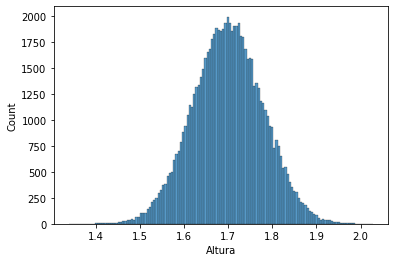

In [11]:
sns.histplot(data=dados, x="Altura")

### Experimento de estatistica

In [41]:
#Random
import random

l_choices = []
for i in range(1000):
    l_choices.append(random.choice(l))
    
def return_prob(l):
    unique = list(set(l)) 
    d = {}
    for i in unique:
        count = len([x for x in l if x == i])
        d[i] = count/len(l)
    
    return d
return_prob(l_choices)

In [70]:
# Z-score
# Usado para descrever quantos desvios padrões esta o valor em relação a média
def z_score(x, mean, std):
    return (x - mean) / std